In [84]:
import numpy as np
import pandas as pd
import seaborn
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
#plotly imports
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from scipy.spatial.distance import cdist, pdist



In [128]:
import io;
import os;
import re;
from google.colab import files
uploaded = files.upload()

Saving 2009.csv to 2009 (8).csv


In [86]:
stats1 = pd.read_csv(io.StringIO(uploaded['2009.csv'].decode('utf-8')))
data = pd.DataFrame(stats1)
data

,Overall,Team,Player,Nat.,Pos,Age,To,Amateur Team,GP,G,A,PTS,+/-,PIM,GP.1,W,L,T/O,SV%,GAA
0,1,New York Islanders,John Tavares\tavarjo01,CA,C,18,2019.0,London (OHL),679.0,279.0,354.0,633.0,-39.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tampa Bay Lightning,Victor Hedman\hedmavi01,SE,D,18,2019.0,MoDo Ornskoldsvik ( ),634.0,84.0,284.0,368.0,63.0,491.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Colorado Avalanche,Matt Duchene\duchema01,CA,C,18,2019.0,Brampton (OHL),662.0,202.0,283.0,485.0,-85.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Atlanta Thrashers,Evander Kane\kaneev01,CA,LW,18,2019.0,Vancouver (WCHL),583.0,190.0,173.0,363.0,-48.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Los Angeles Kings,Brayden Schenn\schenbr01,CA,C,18,2019.0,Brandon (WHL),524.0,140.0,185.0,325.0,-24.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,7,San Jose Sharks,Dominik Bielke\bielkdo01,DE,D,18,NaN,Eisbaren Jrs. Berlin (German-3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,7,Carolina Hurricanes,Tommi Kivisto\kivisto01,FI,D,18,NaN,Red Deer (WHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,7,Chicago Blackhawks,David Gilbert\gilbeda01,CA,C,18,NaN,Quebec (QMJHL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,7,Detroit Red Wings,Adam Almqvist\almqvad01,SE,D,18,2014.0,HV 71 Jonkoping Jr. (Sweden-Jr.),2.0,1.0,0.0,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# creating a dict file  
team = {'New York Islanders': 1, 'Tampa Bay Lightning': 2, 'Colorado Avalanche': 3, 'Atlanta Thrashers': 4, 'Los Angeles Kings': 5, 'Phoenix Coyotes': 6,
        'Toronto Maple Leafs': 7, 'Dallas Stars': 8, 'Ottawa Senators': 9, 'Edmonton Oilers': 10, 'Nashville Predators': 11, 
        'Buffalo Sabres': 12, 'Florida Panthers': 13, 'Anaheim Ducks': 14, 'Minnesota Wild': 15, 'St. Louis Blues': 16, 'Montreal Canadiens': 17,'New York Rangers': 18, 
        'New Jersey Devils': 19, 'Columbus Blue Jackets': 20, 'Vancouver Canucks': 21, 'Calgary Flames': 22, 'Washington Capitals': 23, 'Boston Bruins': 24, 
        'Carolina Hurricanes': 25, 'Chicago Blackhawks': 26, 'Pittsburgh Penguins': 27, 'Detroit Red Wings': 28, 'San Jose Sharks': 29, 'Philadelphia Flyers': 30} 
data.Team = [team[item] for item in data.Team] 

In [88]:
Pos = {'C': 1, 'D': 2, 'RW': 3, 'LW': 4, 'C/W': 5, 'G': 6, 'W': 7, 'C/LW': 8, 'C/RW': 9}
data.Pos = [Pos[item] for item in data.Pos]

In [89]:
data.head()
X = data.copy()

In [90]:
X.head()

,Overall,Team,Player,Nat.,Pos,Age,To,Amateur Team,GP,G,A,PTS,+/-,PIM,GP.1,W,L,T/O,SV%,GAA
0,1,1,John Tavares\tavarjo01,CA,1,18,2019.0,London (OHL),679.0,279.0,354.0,633.0,-39.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Victor Hedman\hedmavi01,SE,2,18,2019.0,MoDo Ornskoldsvik ( ),634.0,84.0,284.0,368.0,63.0,491.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,Matt Duchene\duchema01,CA,1,18,2019.0,Brampton (OHL),662.0,202.0,283.0,485.0,-85.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Evander Kane\kaneev01,CA,4,18,2019.0,Vancouver (WCHL),583.0,190.0,173.0,363.0,-48.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,Brayden Schenn\schenbr01,CA,1,18,2019.0,Brandon (WHL),524.0,140.0,185.0,325.0,-24.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
X.drop(["Player", "Nat.", "To", "Amateur Team", "+/-"], axis=1, inplace=True)

In [92]:
X = pd.get_dummies(X)

In [93]:
N = X[["Overall","Team","Pos","Age","GP","G", "A", "PTS", "PIM"]]

In [94]:
N.head()

,Overall,Team,Pos,Age,GP,G,A,PTS,PIM
0,1,1,1,18,679.0,279.0,354.0,633.0,311.0
1,1,2,2,18,634.0,84.0,284.0,368.0,491.0
2,1,3,1,18,662.0,202.0,283.0,485.0,158.0
3,1,4,4,18,583.0,190.0,173.0,363.0,696.0
4,1,5,1,18,524.0,140.0,185.0,325.0,281.0


In [95]:
N.fillna(0)

,Overall,Team,Pos,Age,GP,G,A,PTS,PIM
0,1,1,1,18,679.0,279.0,354.0,633.0,311.0
1,1,2,2,18,634.0,84.0,284.0,368.0,491.0
2,1,3,1,18,662.0,202.0,283.0,485.0,158.0
3,1,4,4,18,583.0,190.0,173.0,363.0,696.0
4,1,5,1,18,524.0,140.0,185.0,325.0,281.0
...,...,...,...,...,...,...,...,...,...
205,7,29,2,18,0.0,0.0,0.0,0.0,0.0
206,7,25,2,18,0.0,0.0,0.0,0.0,0.0
207,7,26,1,18,0.0,0.0,0.0,0.0,0.0
208,7,28,2,18,2.0,1.0,0.0,1.0,0.0


In [96]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(N)

     Overall  Team  Pos  Age     GP      G      A    PTS    PIM
0          1     1    1   18  679.0  279.0  354.0  633.0  311.0
1          1     2    2   18  634.0   84.0  284.0  368.0  491.0
2          1     3    1   18  662.0  202.0  283.0  485.0  158.0
3          1     4    4   18  583.0  190.0  173.0  363.0  696.0
4          1     5    1   18  524.0  140.0  185.0  325.0  281.0
5          1     6    2   18  585.0  102.0  193.0  295.0  370.0
6          1     7    1   18  498.0  146.0  172.0  318.0  348.0
7          1     8    3   18    1.0    0.0    0.0    0.0    2.0
8          1     9    2   18  249.0   15.0   31.0   46.0  174.0
9          1    10    4   18  395.0   51.0   54.0  105.0   72.0
10         1    11    2   18  406.0   55.0  124.0  179.0  142.0
11         1     1    2   18  313.0   12.0   70.0   82.0  126.0
12         1    12    3   18  392.0   52.0   65.0  117.0  619.0
13         1    13    2   18  572.0   33.0  122.0  155.0  350.0
14         1    14    1   18  266.0   36

In [106]:
N = N.apply (pd.to_numeric, errors='coerce')
N = N.replace(np.nan,0)

print (N)

     Overall  Team  Pos  Age     GP      G      A    PTS    PIM
0          1     1    1   18  679.0  279.0  354.0  633.0  311.0
1          1     2    2   18  634.0   84.0  284.0  368.0  491.0
2          1     3    1   18  662.0  202.0  283.0  485.0  158.0
3          1     4    4   18  583.0  190.0  173.0  363.0  696.0
4          1     5    1   18  524.0  140.0  185.0  325.0  281.0
..       ...   ...  ...  ...    ...    ...    ...    ...    ...
205        7    29    2   18    0.0    0.0    0.0    0.0    0.0
206        7    25    2   18    0.0    0.0    0.0    0.0    0.0
207        7    26    1   18    0.0    0.0    0.0    0.0    0.0
208        7    28    2   18    2.0    1.0    0.0    1.0    0.0
209        7    17    6   19    0.0    0.0    0.0    0.0    0.0

[210 rows x 9 columns]


In [107]:
N = pd.get_dummies(N)

In [108]:
N.head()

,Overall,Team,Pos,Age,GP,G,A,PTS,PIM
0,1,1,1,18,679.0,279.0,354.0,633.0,311.0
1,1,2,2,18,634.0,84.0,284.0,368.0,491.0
2,1,3,1,18,662.0,202.0,283.0,485.0,158.0
3,1,4,4,18,583.0,190.0,173.0,363.0,696.0
4,1,5,1,18,524.0,140.0,185.0,325.0,281.0


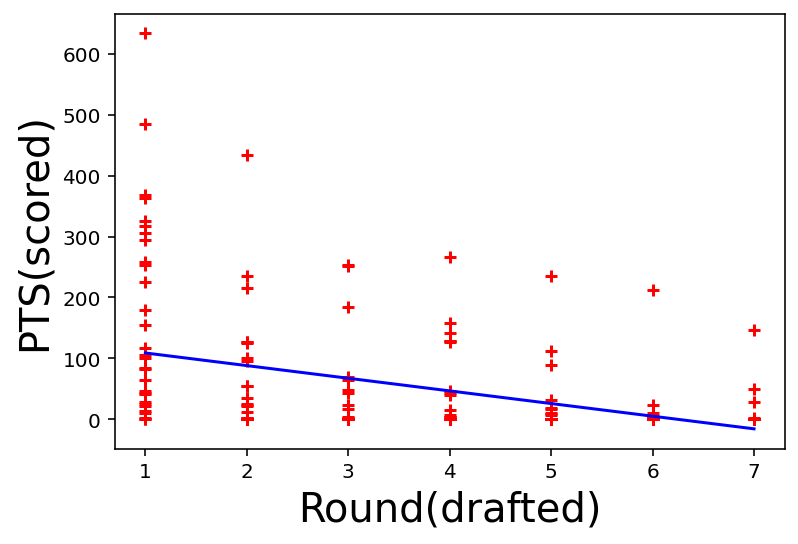

In [155]:
%matplotlib inline
plt.xlabel('Round(drafted)', fontsize=20)
plt.ylabel('PTS(scored)', fontsize=20)
plt.scatter(N.Overall, N.PTS, color='red', marker='+')
plt.plot(N.Overall,reg.predict(N[['Overall']]),color= 'blue')

In [171]:
reg = linear_model.LinearRegression()
reg.fit(N[['PTS']], N.Overall)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
reg.predict(np.array([150]).reshape(1, 1))

array([3.10166662])

In [ ]:
#not a bad prediction here

In [173]:
reg.coef_

array([-0.00881352])

In [174]:
reg.intercept_

4.4236947399517925

In [175]:
#y=mx+b
-20.74116142*3.1+4.4236947399517925

-0.00881352*150+4.4236947399517925

3.1016667399517925

In [ ]:
#prediction for round is roughly
#Round =  (-0.00881352)<-Slope * (150)<-pts + (4.42369)<- y-intercept

In [203]:
from google.colab import files
uploaded = files.upload()

Saving PTS.csv to PTS (2).csv


In [204]:
Nx = pd.read_csv("PTS.csv")
Nx.head(3)

,PTS
0,633
1,368
2,485


In [206]:
p = reg.predict(Nx)

In [210]:
Nx['Overall'] = p

In [211]:
Nx.to_csv("prediction.csv", index=False)

In [213]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(Nx)

     PTS   Overall
0    633 -1.155264
1    368  1.180319
2    485  0.149137
3    363  1.224387
4    325  1.559300
5    295  1.823706
6    318  1.620995
7      0  4.423695
8     46  4.018273
9    105  3.498275
10   179  2.846075
11    82  3.700986
12   117  3.392513
13   155  3.057599
14    85  3.674545
15   258  2.149806
16    25  4.203357
17    10  4.335560
18   226  2.431839
19    64  3.859629
20   100  3.542343
21    42  4.053527
22    14  4.300305
23   306  1.726757
24    28  4.176916
25   254  2.185060
26    22  4.229797
27     3  4.397254
28    43  4.044713
29     0  4.423695
30    12  4.317932
31   433  0.607440
32     1  4.414881
33    95  3.586410
34     3  4.397254
35     1  4.414881
36   127  3.304378
37   216  2.519974
38    35  4.115222
39    26  4.194543
40    22  4.229797
41     3  4.397254
42     0  4.423695
43     0  4.423695
44    24  4.212170
45     0  4.423695
46    55  3.938951
47   127  3.304378
48     1  4.414881
49    55  3.938951
50   125  3.322005
51     0  4.

In [214]:
from joblib import dump, load 
dump(Nx, 'svc_model.pkl')

['svc_model.pkl']